In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [13]:
output_dir = os.path.join('..', 'outputs', 'alexnet')
target = 'precision'

scores = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
experimentos = ['base', 'blur']
apellidos = ['', '_weighted_1']


# Armar diccionario de experimentos
for exp in experimentos:
    for apellido in apellidos:
        scores[exp + apellido] = []

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for exp in experimentos:
        for apellido in apellidos:
            path_predicciones = os.path.join(output_dir, exp, f'{n}L{apellido}', 'metadata.csv')
            predicciones = pd.read_csv(path_predicciones, index_col = 0)
            score = float(predicciones.loc[[target]].values[0][0])
            #print(path_predicciones, score[0][0])
            scores[exp + apellido].append(score)
            

In [14]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 200
plotter = KunischPlotter()

D:\Escritorio\Semestre-envs\TesisMV\notebooks\utils.py:247: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


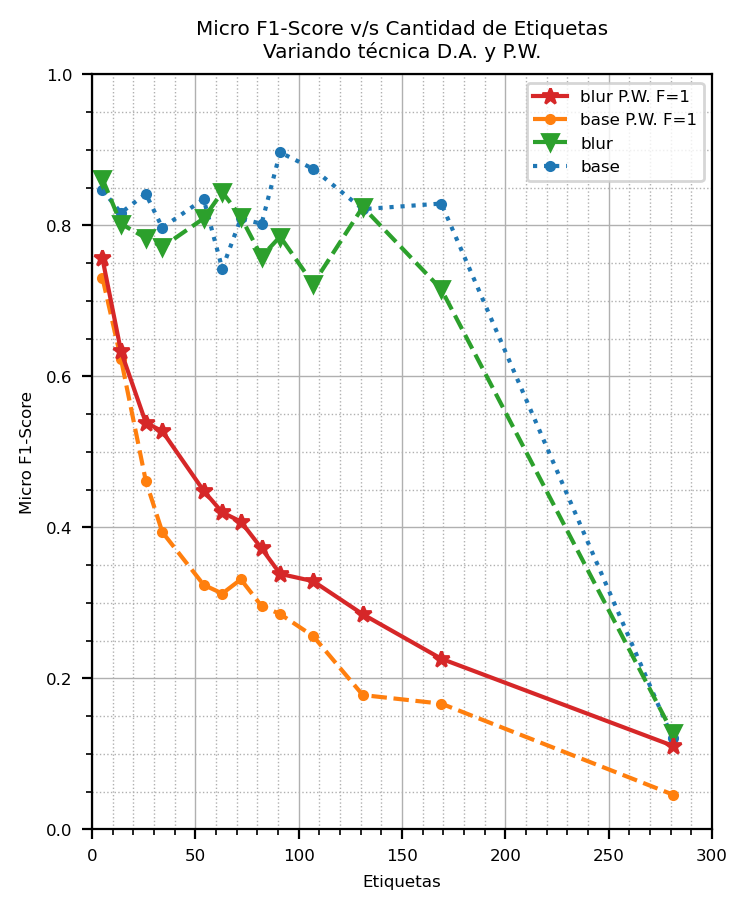

In [15]:
labels = ['base', 'base P.W. F=1', 'blur', 'blur P.W. F=1']
plotter.plot_results(nlabels,
             score = list(scores.values()),
             label = labels,
             title = 'Micro F1-Score v/s Cantidad de Etiquetas\nVariando técnica D.A. y P.W.',
             xlabel = "Etiquetas", ylabel = "Micro F1-Score",
             ylim = 1.0,
             xlim = 300,
             width = 4,
             height = 5,
             grid = True,
             minorgrid = True,
             order = [3, 1, 2, 0])